# Request Roll damping API

In [1]:
%matplotlib.notebook

UsageError: Line magic function `%matplotlib.notebook` not found.


In [27]:
import requests
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

## Simple request

In [9]:
request = r'http://marale.pythonanywhere.com/api/roll_damping?lpp=100&beam=10&T=2&BK_L=0&BK_B=0&OG=0&omega0_hat=0.1&C_b=0.7&A_0=0.97&V=10&phi_a=0.1'

r = requests.get(request)
assert r.status_code is 200
result = r.json()

In [10]:
result

{'B_e_hat': 0.001010855968957833,
 'lpp': 100.0,
 'method': 'static/models/polynom_complex.sym'}

In [11]:
result['B_e_hat']

0.001010855968957833

In [24]:
def get_rolldamping(row):
    lpp=row.lpp
    beam=row.beam
    T=row['T']
    BK_L=row['BK_L']
    BK_B=row['BK_B']
    OG=row['OG']
    omega0_hat=row['omega0_hat']
    C_b=row['C_b']
    A_0=row['A_0']
    V=row['V']
    phi_a=row['phi_a']

    request = f'http://marale.pythonanywhere.com/api/roll_damping?lpp={lpp}&beam={beam}&T={T}&BK_L={BK_L}&BK_B={BK_B}&OG={OG}&omega0_hat={omega0_hat}&C_b={C_b}&A_0={A_0}&V={V}&phi_a={phi_a}'

    r = requests.get(request)
    assert r.status_code is 200
    result = r.json()
    result_ = pd.Series(result, name=row.name)
    return result_

In [35]:
N=100
index = np.arange(0,N)
inputs = pd.DataFrame(index=index)

inputs['lpp']=100
inputs['beam']=10
inputs['T']=2
inputs['BK_L']=0
inputs['BK_B']=0
inputs['OG']=0
inputs['omega0_hat']=0.5
inputs['C_b']=0.8
inputs['A_0']=0.96
inputs['V']=np.linspace(0,10,N)
inputs['phi_a']=np.deg2rad(3)

result = inputs.apply(func=get_rolldamping, axis=1)
result.head()

,B_e_hat,lpp,method
0,0.005706,100.0,/home/marale/REST_API_roll_damping/static/mode...
1,0.005664,100.0,/home/marale/REST_API_roll_damping/static/mode...
2,0.005622,100.0,/home/marale/REST_API_roll_damping/static/mode...
3,0.005582,100.0,/home/marale/REST_API_roll_damping/static/mode...
4,0.005542,100.0,/home/marale/REST_API_roll_damping/static/mode...


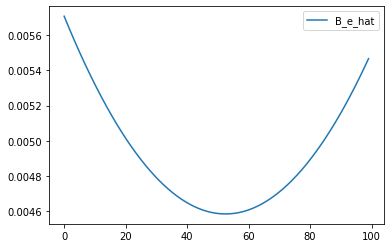

In [36]:
fig,ax=plt.subplots()
result.plot(y='B_e_hat', ax=ax)
